<a href="https://colab.research.google.com/github/akif2540/AygazBootcampProjectDeneme/blob/main/aygazDENEME.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns

In [ ]:
insurance= pd.read_csv('insurance.csv')

In [ ]:
df=insurance.copy() # gerçek veriyi bozmamak için veriyi kopyaladık
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# İlk 5 satırını getirdik
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.isna().sum() #üzerinde kullanılan bir işlemdir ve eksik (NaN) değerlerin her sütundaki toplam sayısını verir.

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
#tür bilgisini kullanarak sütunları kategorik veya sayısal olarak sınıflandırdık
def grab_col_names(df):
    cat_cols = [col for col in df.columns if df[col].dtype == "O"]
    num_cols = [col for col in df.columns if df[col].dtype != "O"]

    print(f"Observations: {df.shape[0]}")
    print(f"Variables: {df.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')

    return cat_cols, num_cols







In [ ]:
cat_cols ,num_cols =grab_col_names(df)

Observations: 1338
Variables: 7
cat_cols: 3
num_cols: 4


In [ ]:
def categorical_summary(df):
    cat_cols = [col for col in df.columns if df[col].dtype == "O"]

    for col in cat_cols:
        print(f"Summary for '{col}':")
        print(df[col].value_counts())
        print("\n")

In [ ]:
categorical_summary(df)

Summary for 'sex':
male      676
female    662
Name: sex, dtype: int64


Summary for 'smoker':
no     1064
yes     274
Name: smoker, dtype: int64


Summary for 'region':
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64




In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_categorical(dataframe, col_names):
    for col_name in col_names:
        plt.figure(figsize=(8, 6))  # Grafik boyutunu
        sns.countplot(x=col_name, data=dataframe, alpha=0.7)
        plt.title(f'Distribution of {col_name}')
        plt.xticks(rotation=45)  # Eksen etiketlerini döndürmek için
        plt.show()

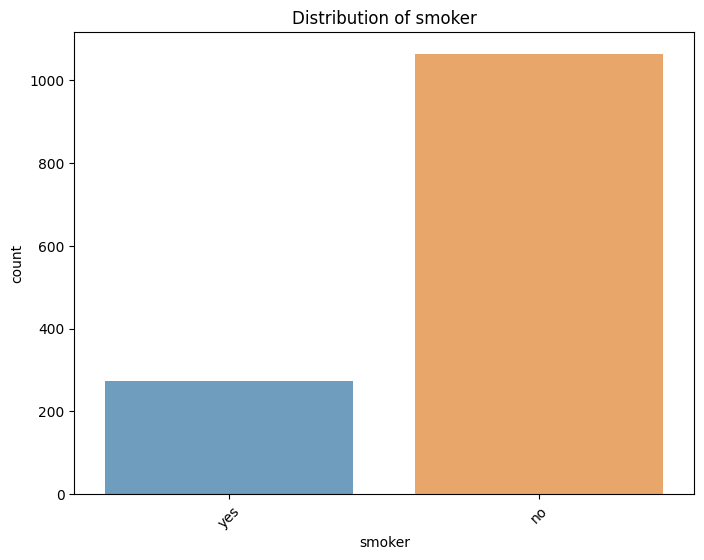

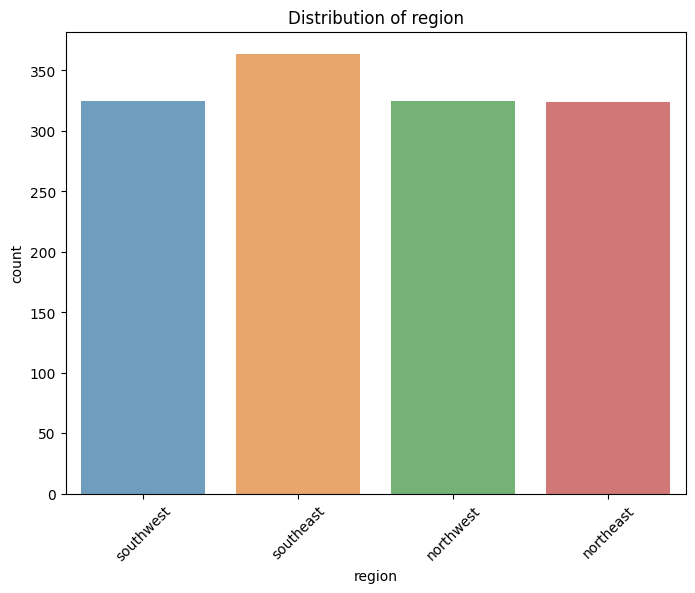

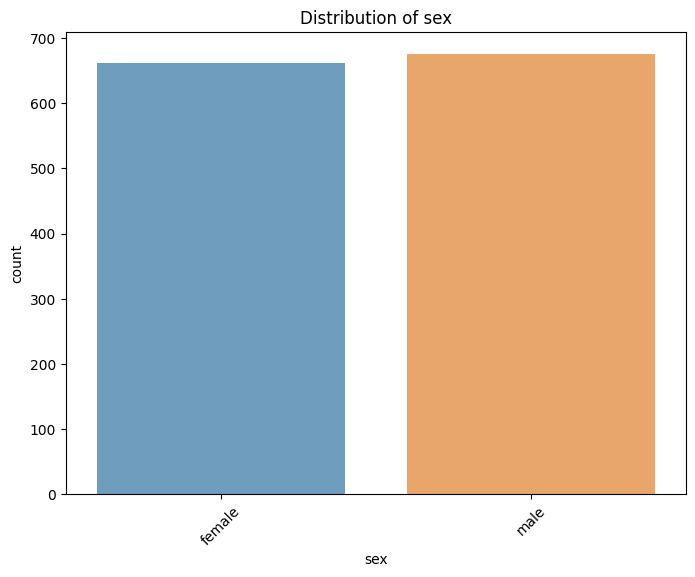

In [ ]:
categorical_columns = ['smoker', 'region', 'sex']
visualize_categorical(df, categorical_columns)


In [ ]:
def visualize_numerical(dataframe, col_names):
    for col_name in col_names:
        plt.figure(figsize=(8, 6))  # Grafik boyutunu
        sns.histplot(data=dataframe, x=col_name, kde=True)
        plt.title(f'Distribution of {col_name}')
        plt.xticks(rotation=45)  # Eksen etiketlerini döndürmek için
        plt.show()
        print(f'Statistical Summary for {col_name}:\n')
        print(dataframe[col_name].describe())

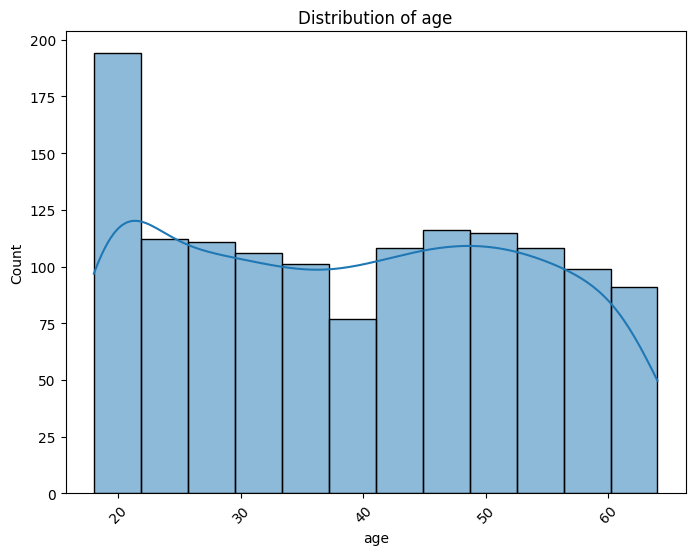

Statistical Summary for age:

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64


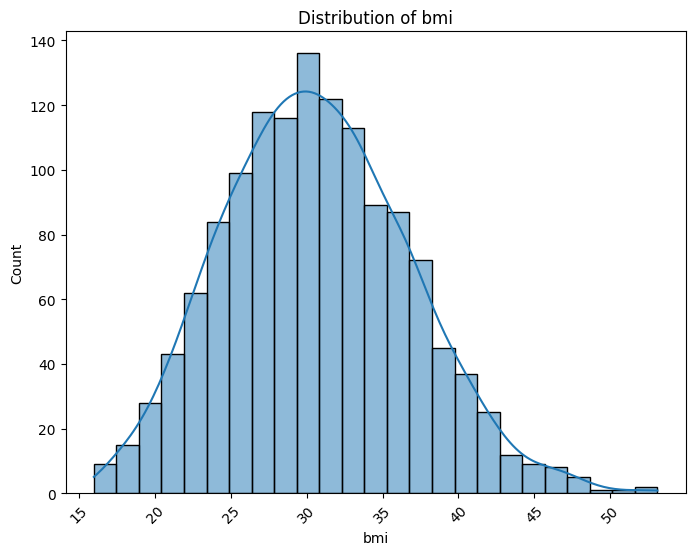

Statistical Summary for bmi:

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64


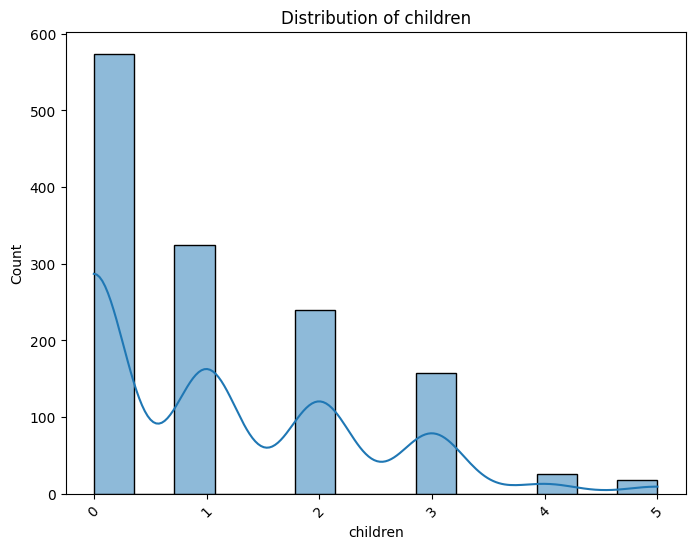

Statistical Summary for children:

count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64


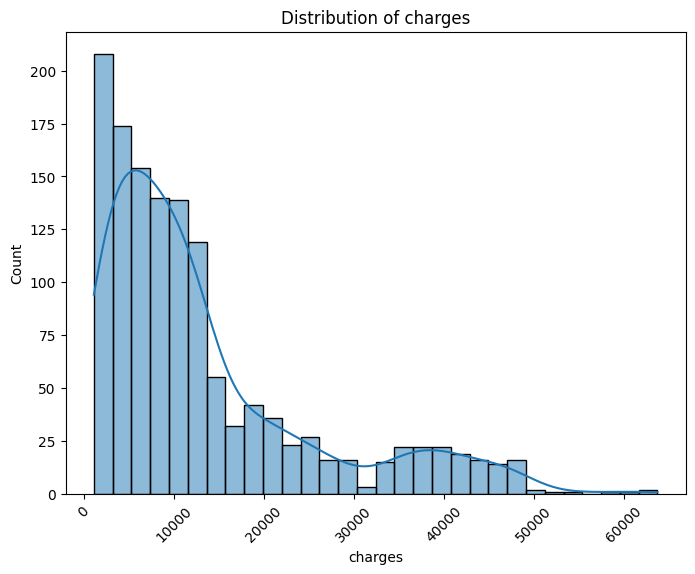

Statistical Summary for charges:

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64


In [ ]:
numerical_columns = ['age', 'bmi', 'children','charges']
visualize_numerical(df, numerical_columns)

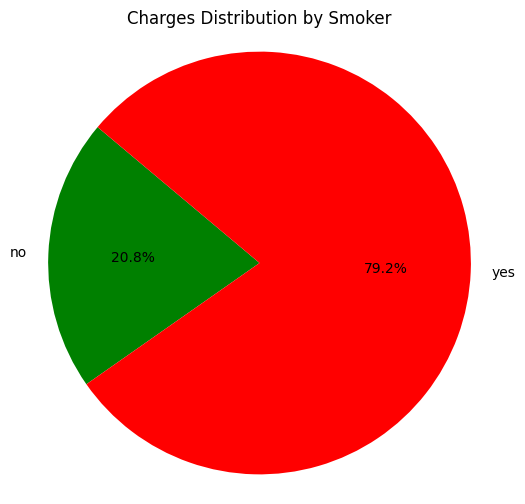

In [ ]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

# Renkler
colors = ['green', 'red']

# 'smoker' ile 'charges' arasındaki ilişkiyi pasta grafiği ile gösterme
smoker_charges = df.groupby('smoker')['charges'].mean()

plt.figure(figsize=(6, 6))
plt.pie(smoker_charges, labels=smoker_charges.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.axis('equal')  # Daireyi dairesel olarak ayarlar
plt.title('Charges Distribution by Smoker')
plt.show()


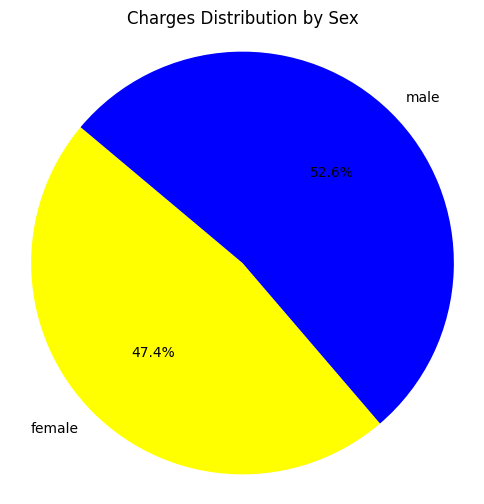

In [ ]:
import matplotlib.pyplot as plt

# Renkler
colors = ['yellow', 'blue']

# 'smoker' ile 'charges' arasındaki ilişkiyi pasta grafiği ile gösterme
smoker_charges = df.groupby('sex')['charges'].mean()

plt.figure(figsize=(6, 6))
plt.pie(smoker_charges, labels=smoker_charges.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.axis('equal')  # Daireyi dairesel olarak ayarlar
plt.title('Charges Distribution by Sex')
plt.show()


<ipython-input-113-b28466d0b77d>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='region', y='charges', data=df, ci=None)


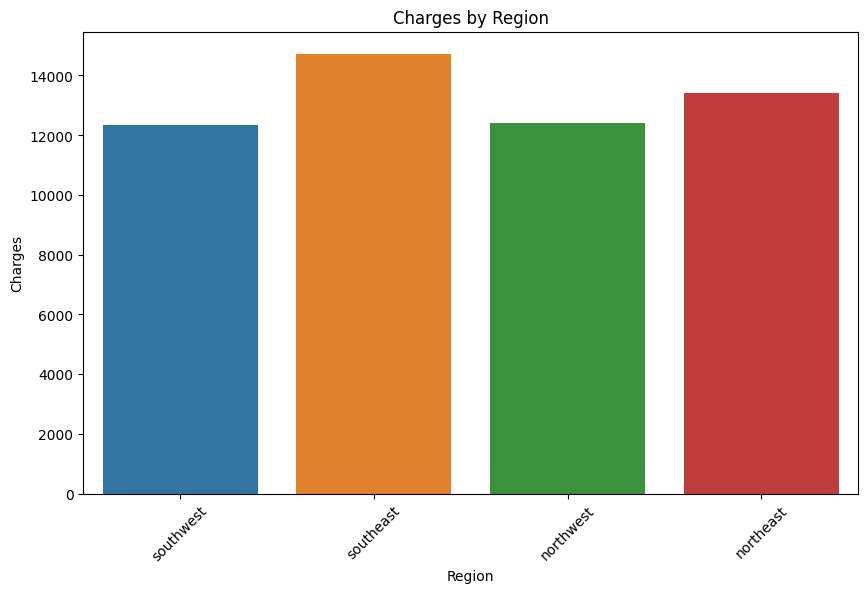

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bölgelere göre masrafın çubuk grafikle gösterimi
plt.figure(figsize=(10, 6))
sns.barplot(x='region', y='charges', data=df, ci=None)
plt.title('Charges by Region')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.xticks(rotation=45)
plt.show()


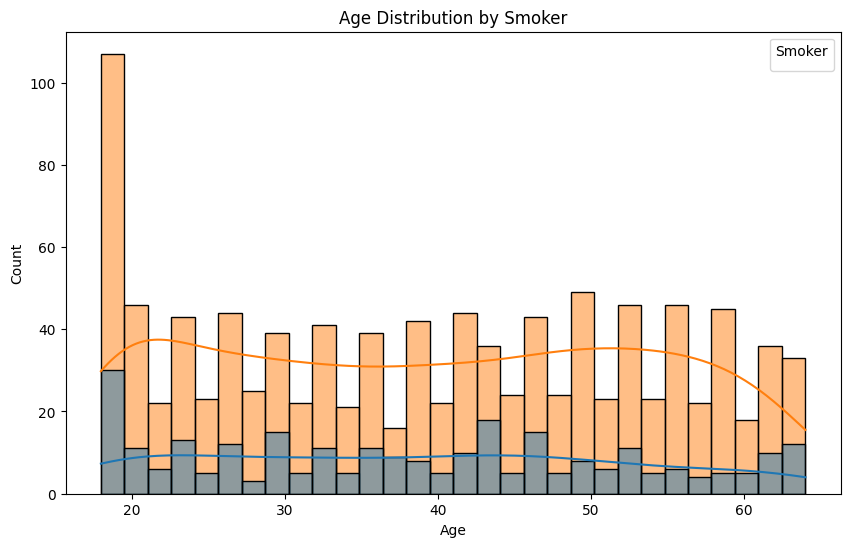

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sigara içenlerin ve içmeyenlerin yaş histogramı
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='smoker', bins=30, kde=True)
plt.title('Age Distribution by Smoker')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Smoker', loc='upper right')
plt.show()


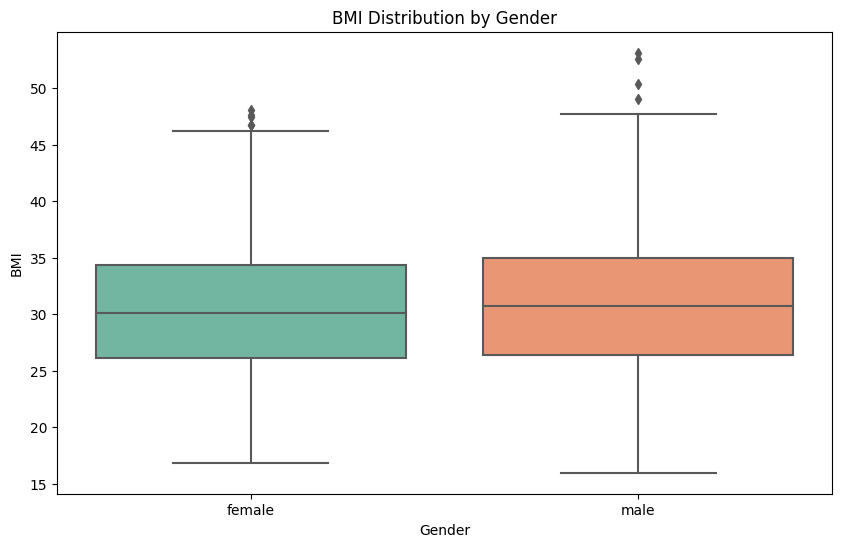

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Cinsiyet (sex) ve BMI (bmi) için yan yana kutu grafikleri
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='sex', y='bmi', palette='Set2')
plt.title('BMI Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('BMI')
plt.show()

<ipython-input-116-414c50cd56d8>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='region', y='children', ci=None, palette='Set3')


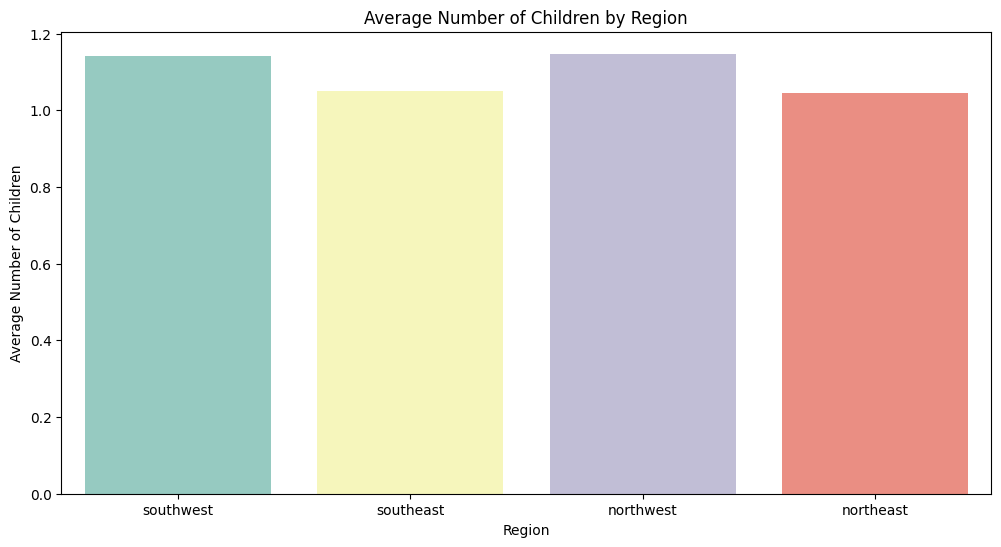

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bölge (region) ve Çocuk Sayısı (children) için çubuk grafik
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='region', y='children', ci=None, palette='Set3')
plt.title('Average Number of Children by Region')
plt.xlabel('Region')
plt.ylabel('Average Number of Children')
plt.show()


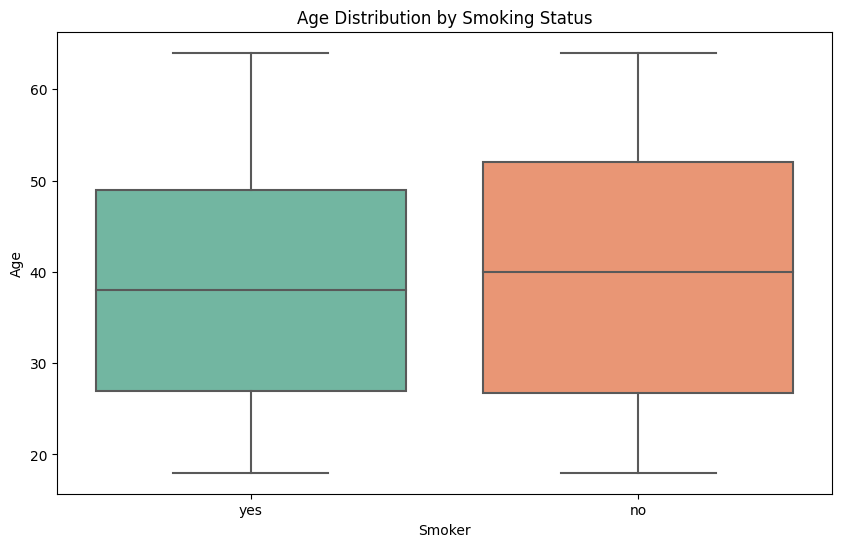

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sigara içenler ve içmeyenler için yaş dağılımını gösteren yan yana kutu grafikleri
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='smoker', y='age', palette='Set2')
plt.title('Age Distribution by Smoking Status')
plt.xlabel('Smoker')
plt.ylabel('Age')
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['smoker'] = label_encoder.fit_transform(df['smoker']) #Bu yöntem, "yes" için 1 ve "no" için 0 olarak dönüşüm yapar.

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex']) #Bu yöntem, "male" için 1 ve "female" için 0 olarak dönüşüm yapar.

In [ ]:
region_mapping = {'northeast': 1, 'southeast': 2, 'southwest': 3, 'northwest': 4}
df['region'] = df['region'].map(region_mapping)  #"region" sütununu sayısal değerlere dönüştürmek için


In [ ]:
df['smoker']=df['smoker'].astype('category') # tipini category yaptık int ten değiştirdik

In [ ]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
sex,1338.0,0.505232,0.500160,0.0000,0.00000,1.000,1.000000,1.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
region,1338.0,2.486547,1.104915,1.0000,2.00000,2.000,3.000000,4.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [ ]:
y=df['smoker']
X=df.drop(['smoker'],axis=1) # outcome ı ayırdık

In [ ]:
X

,age,sex,bmi,children,region,charges
0,19,0,27.900,0,3,16884.92400
1,18,1,33.770,1,2,1725.55230
2,28,1,33.000,3,2,4449.46200
3,33,1,22.705,0,4,21984.47061
4,32,1,28.880,0,4,3866.85520
...,...,...,...,...,...,...
1333,50,1,30.970,3,4,10600.54830
1334,18,0,31.920,0,1,2205.98080
1335,18,0,36.850,0,2,1629.83350
1336,21,0,25.800,0,3,2007.94500


In [ ]:
y

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: category
Categories (2, int64): [0, 1]

In [ ]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [ ]:

from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=200)
model.fit(X_train,y_train)

LogisticRegression(max_iter=200)

In [ ]:
model.intercept_

array([-0.00320852])

In [ ]:
model.coef_ # kat sayılar x lern etkisini belirleyen


array([[-0.07986479, -0.00024748, -0.17315038, -0.00653767, -0.00778265,
         0.00037887]])

In [ ]:
X_test[:5] # son beş data


,age,sex,bmi,children,region,charges
801,64,0,35.97,0,2,14313.84630
1168,32,1,35.20,2,3,4670.64000
495,20,1,27.93,0,1,1967.02270
696,53,0,32.30,2,1,29186.48236
789,62,0,29.92,0,2,13457.96080


In [ ]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0])

In [ ]:
y_pred[:5]

array([0, 0, 0, 1, 0])

In [ ]:
from sklearn.metrics import confusion_matrix
df=pd.DataFrame(confusion_matrix(y_test,y_pred), columns=['Predicted Positive','Predicted Negative'],
                index=['Actual Positive' ,'Actual Negative'])
df

,Predicted Positive,Predicted Negative
Actual Positive,201,16
Actual Negative,6,45


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.917910447761194

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       217
           1       0.74      0.88      0.80        51

    accuracy                           0.92       268
   macro avg       0.85      0.90      0.88       268
weighted avg       0.93      0.92      0.92       268



In [ ]:

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print(f"Accuracy:{accuracy_score(y_test,y_pred)}")
print(f"precision:{precision_score(y_test,y_pred)}")
print(f"recall:{recall_score(y_test,y_pred)}")
print(f"f1:{f1_score(y_test,y_pred)}")

Accuracy:0.917910447761194
precision:0.7377049180327869
recall:0.8823529411764706
f1:0.8035714285714285


In [ ]:
model.predict_proba(X_test)[:10]

array([[9.97362254e-01, 2.63774647e-03],
       [9.99013992e-01, 9.86007638e-04],
       [9.96663098e-01, 3.33690170e-03],
       [2.29992299e-01, 7.70007701e-01],
       [9.93645219e-01, 6.35478054e-03],
       [9.81502532e-01, 1.84974678e-02],
       [9.96378534e-01, 3.62146560e-03],
       [2.86690217e-01, 7.13309783e-01],
       [9.96367882e-01, 3.63211820e-03],
       [3.50298931e-01, 6.49701069e-01]])

In [ ]:
y_test[:10]

801     0
1168    0
495     0
696     0
789     0
232     0
709     0
474     1
104     0
494     1
Name: smoker, dtype: category
Categories (2, int64): [0, 1]

In [ ]:
y_probability=model.predict_proba(X_test)
y_probability=y_probability[:,1]
y_probability[0:10]

array([0.00263775, 0.00098601, 0.0033369 , 0.7700077 , 0.00635478,
       0.01849747, 0.00362147, 0.71330978, 0.00363212, 0.64970107])

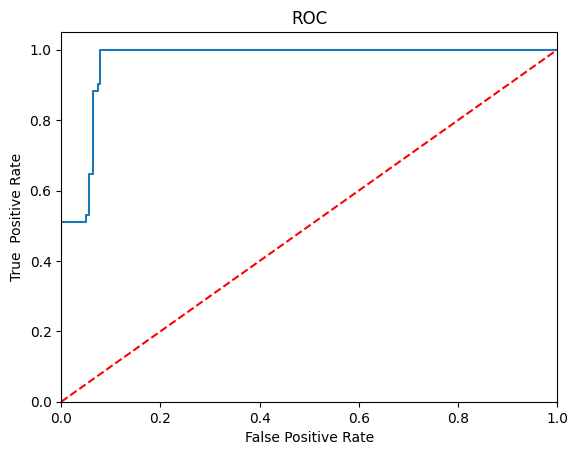

In [ ]:

import matplotlib.pyplot as plt
from sklearn.metrics import  roc_auc_score, roc_curve
model_roc_auc=roc_auc_score(y_test,model.predict(X_test))

fpr,tpr,threshold=roc_curve(y_test,model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label="AUC(area=%0.2f)" %model_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim(([0.0,1.0]))
plt.ylim(([0.0,1.05]))
plt.xlabel('False Positive Rate')
plt.ylabel('True  Positive Rate')
plt.title('ROC')
plt.show();